In [1]:
%load_ext notexbook

%texify -fs 18

# Deep Networks in a Nutshell

<img alt="learning process" title="The Learning Process" src="./images/learning_process.png" class="maxw80" />

<span class="fn">**Source**: Antiga, L et al. _Deep Learning with PyTorch_ [link](https://www.manning.com/books/deep-learning-with-pytorch)</span>

### Setup the learning process

**Main Components of the learning process of a `NN`**:

<img alt="Main Components" title="Main Components" src="./images/model_optim.png" class="maxw80" />

<span class="fn">**Source**: Antiga, L et al. _Deep Learning with PyTorch_ [link](https://www.manning.com/books/deep-learning-with-pytorch)</span>

# Convolutional Neural Network

A convolutional neural network (CNN, or ConvNet) is a type of **feed-forward** artificial neural network in which the connectivity pattern between its neurons is inspired by the organization of the animal visual cortex.

The networks consist of multiple layers of small neuron collections which process portions of the input image, called **receptive fields**. 

The outputs of these collections are then tiled so that their input regions overlap, to obtain a _better representation_ of the original image; this is repeated for every such layer.

## How does it look like?

<img src="./images/convnets_cover.png" width="70%" />

> source: https://flickrcode.files.wordpress.com/2014/10/conv-net2.png

## The Problem Space 

### Image Classification

Image classification is the task of taking an input image and outputting a class (a cat, dog, etc) or a probability of classes that best describes the image. 

For humans, this task of recognition is one of the first skills we learn from the moment we are born and is one that comes naturally and effortlessly as adults.

These skills of being able to quickly recognize patterns, *generalize* from prior knowledge, and adapt to different image environments are ones that we do not share with machines.

#### Inputs and Outputs

<img src="./images/cnn1.png" width="70%" />

<span class="fn"><i>source:</i> [http://www.pawbuzz.com/wp-content/uploads/sites/551/2014/11/corgi-puppies-21.jpg]()</span>

When a computer sees an image (takes an image as input), it will see an array of pixel values. 

Depending on the resolution and size of the image, it will see a 32 x 32 x 3 array of numbers (The 3 refers to RGB values).

let's say we have a color image in JPG form and its size is 480 x 480. The representative array will be 480 x 480 x 3. Each of these numbers is given a value from 0 to 255 which describes the pixel intensity at that point.

#### Goal

What we want the computer to do is to be able to differentiate between all the images it’s given and figure out the unique features that make a dog a dog or that make a cat a cat. 

When we look at a picture of a dog, we can classify it as such if the picture has identifiable features such as paws or 4 legs. 

In a similar way, the computer should be able to perform image classification by looking for *low level* features such as edges and curves, and then building up to more abstract concepts through a series of **convolutional layers**.

### Structure of a CNN

> A more detailed overview of what CNNs do would be that you take the image, pass it through a series of convolutional, nonlinear, pooling (downsampling), and fully connected layers, and get an output. As we said earlier, the output can be a single class or a probability of classes that best describes the image. 

<span class="fn"><i>source:</i> [1]

#### Convolutional Layer

The first layer in a CNN is always a **Convolutional Layer**.

### tldr;

<img src="https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/no_padding_strides.gif" class="maxw40">

<img src="https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/padding_strides.gif" class="maxw40">



**Reference**: [conv_arithmetic](https://github.com/vdumoulin/conv_arithmetic)

#### Convolutional filters



A Convolutional filter much like a **kernel** in image recognition is a small matrix useful for blurring, sharpening, embossing, edge detection, and more. 

This is accomplished by means of convolution between a kernel and an image.

The main goal of CNN is to **learn** the convolutional filters to be applied on images.

As the filter is sliding, or **convolving**, around the input image, it is multiplying the values in the filter with the original pixel values of the image <br>
(a.k.a. computing **element wise multiplications**).

<img src="./images/cnn2.png" width="80%">

Now, we repeat this process for every location on the input volume. (Next step would be moving the filter to the right by 1 unit, then right again by 1, and so on).

After sliding the filter over all the locations, we are left with an array of numbers usually called an **activation map** or **feature map**.

---

### Convolution in a Nutshell

Let’s talk about briefly what this convolution is actually doing from a high level. 

Each of these filters can be thought of as **feature identifiers** (e.g. *straight edges, simple colors, curves*)

<img src="./images/cnn3.png" width="70%" />

#### Visualisation of the Receptive Field

<img src="./images/cnn4.png" width="80%" />

<img src="./images/cnn5.png" width="80%" />

<img src="./images/cnn6.png" width="80%" />

The value is much lower! This is because there wasn’t anything in the image section that responded to the curve detector filter. Remember, the output of this conv layer is an activation map. 


---

### Convolution $\mapsto$ Convolutional Neural Networks

Now in a traditional **convolutional neural network** architecture, there are other layers that are interspersed between these conv layers.

<img src="https://adeshpande3.github.io/assets/Table.png"/>

##### ReLU (Rectified Linear Units) Layer

 After each conv layer, it is convention to apply a *nonlinear layer* (or **activation layer**) immediately afterward.


The purpose of this layer is to introduce nonlinearity to a system that basically has just been computing linear operations during the conv layers (just element wise multiplications and summations)

In the past, nonlinear functions like tanh and sigmoid were used, but researchers found out that **ReLU layers** work far better because the network is able to train a lot faster (because of the computational efficiency) without making a significant difference to the accuracy.

It also helps to alleviate the **vanishing gradient problem**, which is the issue where the lower layers of the network train very slowly because the gradient decreases exponentially through the layers

(**very briefly**)

Vanishing gradient problem depends on the choice of the activation function. 

Many common activation functions (e.g `sigmoid` or `tanh`) *squash* their input into a very small output range in a very non-linear fashion. 

For example, sigmoid maps the real number line onto a "small" range of [0, 1].

As a result, there are large regions of the input space which are mapped to an extremely small range. 

In these regions of the input space, even a large change in the input will produce a small change in the output - hence the **gradient is small**.

###### ReLu

The **ReLu** function is defined as $f(x) = \max(0, x),$ [2]

A smooth approximation to the rectifier is the *analytic function*: $f(x) = \ln(1 + e^x)$

which is called the **softplus** function.

The derivative of softplus is $f'(x) = e^x / (e^x + 1) = 1 / (1 + e^{-x})$, i.e. the **logistic function**.


<span class="fn"><i>[2]</i> 
    [http://www.cs.toronto.edu/~fritz/absps/reluICML.pdf]() by G. E. Hinton</span>

#### Pooling Layers

 After some ReLU layers, it is customary to apply a **pooling layer** (aka *downsampling layer*).

In this category, there are also several layer options, with **maxpooling** being the most popular. 

Example of a MaxPooling filter

<img src="./images/MaxPool.png" class="maxw60%" />

Other options for pooling layers are average pooling and L2-norm pooling. 

The intuition behind this Pooling layer is that once we know that a specific feature is in the original input volume (there will be a high activation value), its exact location is not as important as its relative location to the other features. 

Therefore this layer drastically reduces the spatial dimension (the length and the width but not the depth) of the input volume.

This serves two main purposes: reduce the amount of parameters; controlling overfitting. 

An intuitive explanation for the usefulness of pooling could be explained by an example: 

Lets assume that we have a filter that is used for detecting faces. The exact pixel location of the face is less relevant then the fact that there is a face "somewhere at the top"

#### Fully Connected Layer

The last layer, however, is an important one, namely the **Fully Connected Layer**.

Basically, a FC layer looks at what high level features most strongly correlate to a particular class and has particular weights so that when you compute the products between the weights and the previous layer, you get the correct probabilities for the different classes.

<img src="https://miro.medium.com/max/2000/1*6hF97Upuqg_LdsqWY6n_wg.png" alt="Resnet" class="maxw80" />

---

## Hands-on on `Fashion-MNIST`

**Deep Learning Training in `10` steps**

##### 1. Import Required Packages

In [2]:
# imports
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

##### 2. Get Dataset and Setup Data Pipeline

In [3]:
# Transformers

# transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

In [4]:
# datasets
trainset = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=True,
    transform=transform)
testset = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=False,
    transform=transform)

# dataloaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                        shuffle=True, num_workers=2)


testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                        shuffle=False, num_workers=2)

In [5]:
# constant for classes
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

In [6]:
# helper function to show an image
# (used in the `plot_classes_preds` function below)
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

##### 3. Define Model and Loss

We’ll define a similar model architecture from that tutorial, making only minor modifications to account for the fact that the images are now one channel instead of three and 28x28 instead of 32x32:

In [7]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

We’ll define the same `optimizer` and `criterion` from before:

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Now we’ll set up TensorBoard, importing `tensorboard` from `torch.utils` and defining a `SummaryWriter`, our key object for writing information to TensorBoard.

In [9]:
from torch.utils.tensorboard import SummaryWriter

# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('runs/fashion_mnist_experiment_1')

Note that this line alone creates a `runs/fashion_mnist_experiment_1` folder.

##### 4. Writing in TensorBoard

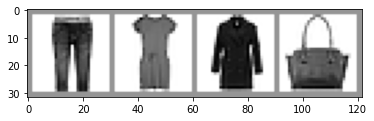

In [10]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# create grid of images
img_grid = torchvision.utils.make_grid(images)

# show images
matplotlib_imshow(img_grid, one_channel=True)

# write to tensorboard
writer.add_image('four_fashion_mnist_images', img_grid)

#### 5. Running `Tensorboard` Server

🛑 **STOP** HERE ✋

Please Run the following command in your terminal:

```bash 
cd cnn-and-adversarial
tensorboard --logdir=runs
```

Now you know how to use TensorBoard! 

$\rightarrow$ [http://localhost:6006](http://localhost:6006)

This example, however, could be done in a Jupyter Notebook - where TensorBoard really excels is in creating interactive visualizations. We’ll cover one of those next, and several more by the end of the tutorial.

**NOTE** ⚠️: If possible, use **Google Chrome** for better performance, see [here](https://github.com/pytorch/pytorch/issues/30525)

##### 6. Inspect the model using TensorBoard

One of TensorBoard’s strengths is its ability to visualize complex model structures. 

Let’s visualize the model we built.

In [11]:
writer.add_graph(net, images)
writer.close()

🛑 **STOP** HERE ✋

Now upon refreshing TensorBoard you should see a **Graphs** tab.

Go ahead and double click on “Net” to see it expand, seeing a detailed view of the individual operations that make up the model.

TensorBoard has a very handy feature for visualizing high dimensional data such as image data in a lower dimensional space; we’ll cover this next.

##### 7. Adding a “Projector” to TensorBoard

We can visualize the lower dimensional representation of higher dimensional data via the add_embedding method

In [12]:
# helper function
def select_n_random(data, labels, n=100):
    '''
    Selects n random datapoints and their corresponding labels from a dataset
    '''
    assert len(data) == len(labels)

    perm = torch.randperm(len(data))
    return data[perm][:n], labels[perm][:n]

# select random images and their target indices
images, labels = select_n_random(trainset.data, trainset.targets)

# get the class labels for each image
class_labels = [classes[lab] for lab in labels]

# log embeddings
features = images.view(-1, 28 * 28)
writer.add_embedding(features,
                    metadata=class_labels,
                    label_img=images.unsqueeze(1))
writer.close()

🛑 **STOP** HERE ✋

Now in the “Projector” tab of TensorBoard, you can see these `100` images - each of which is `784` dimensional - projected down into three dimensional space. 

⚠️: If possible, use **Google Chrome** for better performance, see [here](https://github.com/pytorch/pytorch/issues/30525)

Furthermore, this is interactive: you can click and drag to rotate the three dimensional projection. 

🧙 
Finally, a couple of tips to make the visualization easier to see: select `color: label` on the top left, as well as enabling `night mode`, which will make the images easier to see since their background is white.

##### 8. Tracking model training with TensorBoard

In the previous example, we simply printed the model’s running loss every `2000` iterations. 

Now, we’ll instead log the running loss to TensorBoard, along with a view into the predictions the model is making via the `plot_classes_preds` function.

In [13]:
# helper functions

def images_to_probs(net, images):
    '''
    Generates predictions and corresponding probabilities from a trained
    network and a list of images
    '''
    output = net(images)
    # convert output probabilities to predicted class
    _, preds_tensor = torch.max(output, 1)
    preds = np.squeeze(preds_tensor.numpy())
    return preds, [F.softmax(el, dim=0)[i].item() for i, el in zip(preds, output)]

In [14]:
def plot_classes_preds(net, images, labels):
    '''
    Generates matplotlib Figure using a trained network, along with images
    and labels from a batch, that shows the network's top prediction along
    with its probability, alongside the actual label, coloring this
    information based on whether the prediction was correct or not.
    Uses the "images_to_probs" function.
    '''
    preds, probs = images_to_probs(net, images)
    # plot the images in the batch, along with predicted and true labels
    fig = plt.figure(figsize=(12, 48))
    for idx in np.arange(4):
        ax = fig.add_subplot(1, 4, idx+1, xticks=[], yticks=[])
        matplotlib_imshow(images[idx], one_channel=True)
        ax.set_title("{0}, {1:.1f}%\n(label: {2})".format(
            classes[preds[idx]],
            probs[idx] * 100.0,
            classes[labels[idx]]),
                    color=("green" if preds[idx]==labels[idx].item() else "red"))
    return fig

Finally, let’s train the model using the same model training code from the prior tutorial, but writing results to TensorBoard every `1000` batches instead of printing to console; this is done using the `add_scalar` function.

In addition, as we train, we’ll generate an image showing the model’s predictions vs. the actual results on the four images included in that batch.

##### 9. Model Training (loop)

In [15]:
running_loss = 0.0
for epoch in range(1):  # loop over the dataset multiple times

    for i, data in enumerate(trainloader, 0):

        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 1000 == 999:    # every 1000 mini-batches...

            # ...log the running loss
            writer.add_scalar('training loss',
                            running_loss / 1000,
                            epoch * len(trainloader) + i)

            # ...log a Matplotlib Figure showing the model's predictions on a
            # random mini-batch
            writer.add_figure('predictions vs. actuals',
                            plot_classes_preds(net, inputs, labels),
                            global_step=epoch * len(trainloader) + i)
            running_loss = 0.0
print('Finished Training')

Finished Training


###### 9.1 Training on a GPU

Just like how you transfer a Tensor onto the GPU, you transfer the neural
net onto the GPU.

Let's first define our device as the first visible cuda device if we have
CUDA available:

In [16]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu


The rest of this section assumes that ``device`` is a CUDA device.

Then these methods will recursively go over all modules and convert their
parameters and buffers to CUDA tensors:

```python
    net.to(device)
```

Remember that you will have to send the inputs and targets at every step
to the GPU too:

```python
    inputs, labels = data[0].to(device), data[1].to(device)
```

Why don't I notice MASSIVE speedup compared to CPU? 

Because your network is really small.

🛑 **STOP** HERE ✋

You can now look at the scalars tab to see the running loss plotted over the `15,000` iterations of training

##### 10. Model Assessment and Precision/Recall Curve

In [17]:
# 1. gets the probability predictions in a test_size x num_classes Tensor
# 2. gets the preds in a test_size Tensor
# takes ~10 seconds to run
class_probs = []
class_preds = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        output = net(images)
        class_probs_batch = [F.softmax(el, dim=0) for el in output]
        _, class_preds_batch = torch.max(output, 1)

        class_probs.append(class_probs_batch)
        class_preds.append(class_preds_batch)

test_probs = torch.cat([torch.stack(batch) for batch in class_probs])
test_preds = torch.cat(class_preds)

In [18]:
# helper function
def add_pr_curve_tensorboard(class_index, test_probs, test_preds, global_step=0):
    '''
    Takes in a "class_index" from 0 to 9 and plots the corresponding
    precision-recall curve
    '''
    tensorboard_preds = test_preds == class_index
    tensorboard_probs = test_probs[:, class_index]

    writer.add_pr_curve(classes[class_index],
                        tensorboard_preds,
                        tensorboard_probs,
                        global_step=global_step)
    writer.close()

# plot all the pr curves
for i in range(len(classes)):
    add_pr_curve_tensorboard(i, test_probs, test_preds)

You will now see a “PR Curves” tab that contains the precision-recall curves for each class.

Go ahead and poke around; you’ll see that on some classes the model has nearly 100% “area under the curve”, whereas on others this area is lower